# 06_통계분석_2

# 판별분석 QDA(Quadratic Discriminant Analysis) 
- LDA는 선형 판별분석 - 07_기계학습_1에서 차원축소를 다룸
- 여기서는 이차 판별분석으로 "분류"하는 예시

In [1]:
# 데이터 생성
import numpy as np
X = np.array([[-1,-1], [-2,-1], [-3,-2], [1,1], [2,1], [3,2]])
y = np.array([1,1,1,2,2,2])

In [2]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf2 = QuadraticDiscriminantAnalysis()
clf2.fit(X,y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [3]:
clf2.predict([[-0.8,-1]])

array([1])

# 다차원척도법 MDS - 계량적(구간척도, 비율척도)

In [12]:
from sklearn.datasets import load_digits
X, _ = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [13]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [14]:
from sklearn.manifold import MDS
mds = MDS(n_components=2)
X_transformed = mds.fit_transform(X[:100])
X_transformed.shape

(100, 2)

In [15]:
X_transformed[:5]

array([[ 11.11239257,  28.49680269],
       [  6.36983387, -20.64867765],
       [ 16.55445425, -28.66577144],
       [-15.10684346,  23.71246291],
       [ 35.91298301, -18.21678131]])

# 다차원척도법 MDS - 비계량적(순서척도)
- Metric = False

In [18]:
from sklearn.manifold import MDS
nmds = MDS(n_components=2, metric=False) # 이거 차이
X_transformed = nmds.fit_transform(X[:100])
X_transformed.shape

(100, 2)

In [19]:
X_transformed[:5]

array([[-0.08422334, -0.1115282 ],
       [-0.22082   ,  0.40054218],
       [-0.27584893,  0.28528715],
       [-0.3236553 ,  0.31823446],
       [ 0.20126871, -0.26102463]])

# 대응분석
- 카이제곱 검정은 두 범주형 변수과 의 연관성 여부를 결정하는 것이며, 구체적으로 두 변수가 가지고 있는 범주들 사이의 관계를 살펴볼 수는 없다. 이러한 문제점을 해결해 주는 통계적 기법이 대응분석이다. 
- 대응분석은 두 개 이상의 범주 군 사이의 상관성을 분석하는 기법이라 할 수 있다.

In [20]:
from sklearn.cross_decomposition import CCA
X = [[0., 0., 1.], [1.,0.,0.], [2.,2.,2.], [3.,5.,4.]]
Y = [[0.1, -0.2], [0.9, 1.1], [6.2, 5.9], [11.9, 12.3]]
cca = CCA(n_components=1)
cca.fit(X, Y)

X_c, Y_c = cca.transform(X, Y)

In [21]:
X_c

array([[-1.3373174 ],
       [-1.10847164],
       [ 0.40763151],
       [ 2.03815753]])

In [22]:
Y_c

array([[-0.85511537],
       [-0.70878547],
       [ 0.26065014],
       [ 1.3032507 ]])

In [23]:
X_test = [[2,4,5]]
Y_test = [[0.4, 5,5]]
cca.predict(X_test, Y_test)

array([[14.04112465, 14.35630774]])

# 시계열 분석 - fbprophet
- prophet은 페이스북에서 개발한 시계열 예측 패키지다. ARIMA와 같은 확률론적이고 이론적인 모형이 아니라 몇가지 경험적 규칙(heuristic rule)을 사용하는 단순 회귀모형이지만 단기적 예측에서는 큰 문제 없이 사용할 수 있다.

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv"
df = pd.read_csv(url)
df.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


In [4]:
from fbprophet import Prophet
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


- yhat이 예측값

In [6]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.203217,7.465164,8.969418
3266,2017-01-16,8.528203,7.758541,9.264207
3267,2017-01-17,8.315601,7.668485,9.087909
3268,2017-01-18,8.148207,7.397069,8.896107
3269,2017-01-19,8.160103,7.498117,8.846597


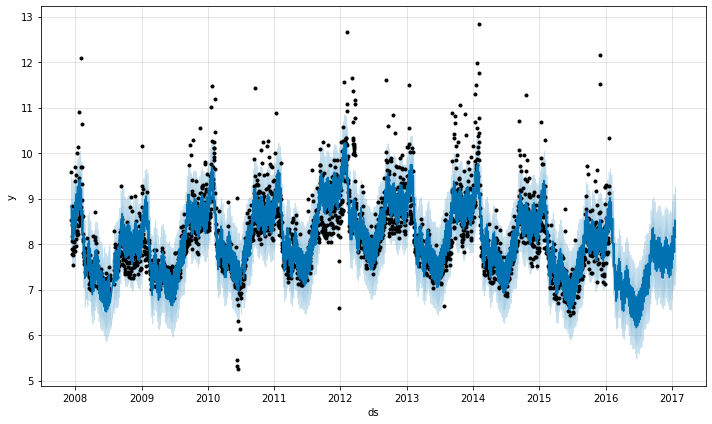

In [7]:
fig1 = m.plot(forecast)

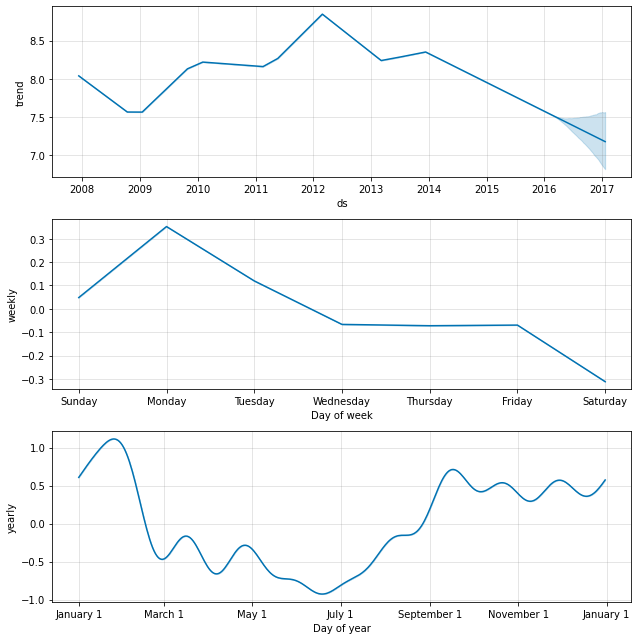

In [8]:
fig2 = m.plot_components(forecast)


# 연관성 분석 = 장바구니분석

In [36]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

- 구매한 물건이 담긴 데이터

In [ ]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Eggs', 'Yogurt'],
           ['Onion', 'Nutmeg', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Ice cream', 'Eggs']]

- Encoding을 해 줌 : 인스턴스 생성 -> fit -> transform

In [37]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [38]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
## parameter
# max_len=3 : 아이템 조합이 3개까지 제한

In [40]:
frequent_itemsets # 전체 구매 데이터 중 해당 itemset이 포함된 확률

,support,itemsets
0,0.8,(Eggs)
1,0.6,(Milk)
2,0.6,(Onion)
3,0.6,(Yogurt)
4,0.6,"(Eggs, Onion)"


In [43]:
association_rules(frequent_itemsets, metric="lift", min_threshold=1) # metric 기준 min_threshold 이상

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
1,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf


**첫 줄 해석**
- antencedents와 consequents가 있는데 각각의 support를 보여줌. 
- 그리고 조합의 support, confidence, lift를 보여주는데 
- confidence : Onion을 사는 고객 중 Eggs+Onion이 75%
- lift: 1이면 서로 영향이 없는 것. 그냥 Onion을 사는 것보다 Egg를 샀을 때 구매율이 1.25배 높아진다는 소리

# 요인분석

In [24]:
from sklearn.datasets import load_digits
X, _ = load_digits(return_X_y=True)

In [26]:
X.shape

(1797, 64)

In [27]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [30]:
from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components=5, random_state=0)
X_transformed = transformer.fit_transform(X)
X_transformed.shape

(1797, 5)

In [32]:
X_transformed

array([[-0.15740939,  0.30545241,  1.88630105,  0.89678859, -0.17029374],
       [-0.87586253,  0.13827044, -1.75345561, -0.83281075, -0.74288303],
       [-0.99892214, -0.43236642, -1.22222905, -0.82192628, -0.77094974],
       ...,
       [-0.70066938,  0.09868465, -0.99651414, -0.14234655, -0.61502155],
       [-0.37322424, -0.18103725,  1.07294051, -0.6538424 , -0.28351881],
       [ 0.64021206, -0.87404644, -0.04237855,  0.32160612, -0.47697811]])

# 사회연결망 분석(SNA)